# Creating

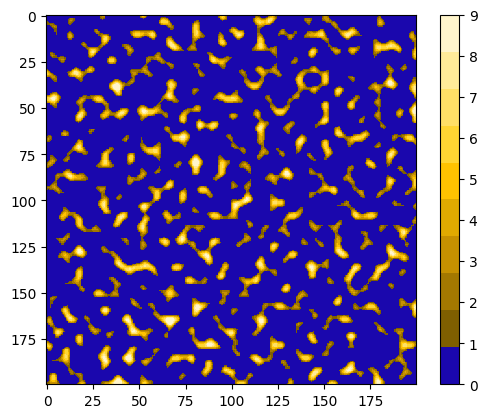

In [1]:
import noise
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def process_sections(arr, n):
    rows, cols = arr.shape

    for i in range(0, rows - (n - 1)):
        for j in range(0, cols - (n - 1)):
            section = arr[i:i+n, j:j+n]
            if (
                (np.all(section[0, :] == 0) or i == 0) and
                (np.all(section[-1, :] == 0) or i + n == rows) and
                (np.all(section[:, 0] == 0) or j == 0) and
                (np.all(section[:, -1] == 0) or j + n == cols) 
            ):
                 arr[i:i+n, j:j+n] = 0


shape = (200, 200)
scale = 7.0
octaves = 60
persistence = 1
lacunarity = 1.0
seed = 91
repeat = 1042

np.random.seed(seed)

world = np.zeros(shape)

for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i / scale,j / scale,octaves=octaves,persistence=persistence,lacunarity=lacunarity,repeatx=repeat,repeaty=repeat,base=seed)

min_val = np.min(world)
max_val = np.max(world)
world = np.round(1 + 29 * (world - min_val) / (max_val - min_val))
world = np.maximum(0, world - 18)
world = np.minimum(9, world)

cmap = ListedColormap(['#1a07ad',"#7f5f00","#a37800","#c69100","#e0aa00","#ffc300","#ffd633","#ffe066","#ffeb99","#fff5cc"])

process_sections(world, 3)
process_sections(world, 4)
process_sections(world, 5)

plt.imshow(world, cmap=cmap, interpolation='antialiased')
plt.colorbar()
plt.savefig("fig.png")
plt.show()
np.savetxt('data.txt', world.astype(int), delimiter=',', fmt='%d')

world = world.astype(int).astype(str)
world = np.where(world == "0", " ", world)
np.savetxt('visual.txt', world, delimiter=',', fmt='%s')

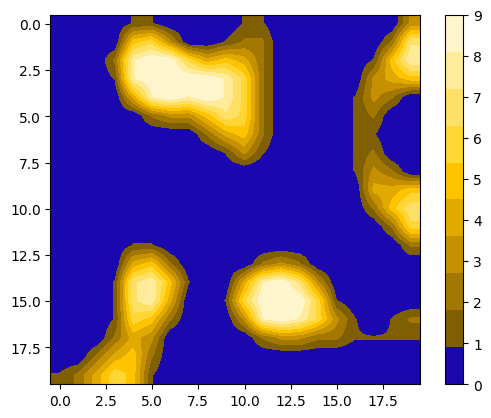

In [47]:
import noise
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def process_sections(arr, n):
    rows, cols = arr.shape

    for i in range(0, rows - (n - 1)):
        for j in range(0, cols - (n - 1)):
            section = arr[i:i+n, j:j+n]
            if (
                (np.all(section[0, :] == 0) or i == 0) and
                (np.all(section[-1, :] == 0) or i + n == rows) and
                (np.all(section[:, 0] == 0) or j == 0) and
                (np.all(section[:, -1] == 0) or j + n == cols) 
            ):
                 arr[i:i+n, j:j+n] = 0


shape = (20, 20)
scale = 6.0
octaves = 6
persistence = 3
lacunarity = 1
seed = 23
repeat = 1042

np.random.seed(seed)

world = np.zeros(shape)

for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i / scale,j / scale,octaves=octaves,persistence=persistence,lacunarity=lacunarity,repeatx=repeat,repeaty=repeat,base=seed)

min_val = np.min(world)
max_val = np.max(world)
world = np.round(1 + 29 * (world - min_val) / (max_val - min_val))
world = np.maximum(0, world - 18)
world = np.minimum(9, world)

cmap = ListedColormap(['#1a07ad',"#7f5f00","#a37800","#c69100","#e0aa00","#ffc300","#ffd633","#ffe066","#ffeb99","#fff5cc"])

process_sections(world, 3)
process_sections(world, 4)
process_sections(world, 5)


plt.imshow(world, cmap=cmap, interpolation='bilinear')
plt.colorbar()
plt.savefig("testfig.png")
plt.show()
np.savetxt('testdata.txt', world.astype(int), delimiter=',', fmt='%d')

world = world.astype(int).astype(str)
world = np.where(world == "0", " ", world)
np.savetxt('testvisual.txt', world, delimiter=',', fmt='%s')

# SOLVING

In [172]:
import numpy as np

def dfs(grid, visited, i, j, school):
    if (
        i not in range(grid.shape[0]) 
        or j not in range(grid.shape[1]) 
        or visited[i, j] 
        or grid[i, j] == 0
    ):
        return

    visited[i, j] = True
    school.append((i, j))

    dfs(grid, visited, i - 1, j, school)
    dfs(grid, visited, i + 1, j, school)
    dfs(grid, visited, i, j - 1, school)
    dfs(grid, visited, i, j + 1, school)

def center_of_mass(school):
    print(f"{school=}")
    total_mass = np.sum(grid[tuple(zip(*school))])
    print(f"{total_mass=}")
    
    fakemx = [f"{grid[i, j]}*{j}" for i, j in sorted(school)]
    mx = np.array([j * grid[i, j] for i, j in school], dtype=np.int16)
    print(f"{')+('.join(fakemx)=}")
    print(f"{sum(mx)=}")
    
    fakemy = [f"{grid[i, j]}*{i}" for i, j in sorted(school)]
    my = np.array([i * grid[i, j] for i, j in school], dtype=np.int16)
    print(f"{')+('.join(fakemy)=}")
    print(f"{my=}")
    print("\n\n")
    return (np.sum(my) // total_mass, np.sum(mx) // total_mass), total_mass
    

def find_schools():
    visited = np.zeros_like(grid, dtype=bool)
    schools = []
    
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] != 0 and not visited[i, j]:
                school = []
                dfs(grid, visited, i, j, school)
                schools.append(school)

    return schools


with open("testdata.txt") as f:
    grid = np.loadtxt(f, delimiter=',', dtype="int16")

result = []
for school in find_schools():
    center, total_mass = center_of_mass(school)
    result.append((total_mass, center))

print(result)
weights = 0
for w, pos in result:
    weights += w
    print(grid[pos])
print(weights)
max(result)

school=[(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 5), (3, 5), (2, 5), (1, 5), (0, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (5, 5), (5, 7), (4, 7), (3, 7), (2, 7), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9), (1, 10), (0, 10), (0, 11), (1, 11), (2, 11), (3, 11), (4, 11), (5, 11), (6, 11), (7, 11), (7, 10), (6, 10), (5, 10), (4, 10), (3, 10), (2, 10), (7, 9), (3, 3), (2, 3)]
total_mass=233
')+('.join(fakemx)='1*4)+(1*5)+(1*10)+(1*11)+(5*4)+(6*5)+(3*6)+(1*9)+(2*10)+(2*11)+(2*3)+(8*4)+(9*5)+(9*6)+(6*7)+(4*8)+(5*9)+(4*10)+(2*11)+(1*3)+(8*4)+(9*5)+(9*6)+(9*7)+(9*8)+(8*9)+(6*10)+(2*11)+(4*4)+(8*5)+(9*6)+(8*7)+(9*8)+(8*9)+(6*10)+(2*11)+(2*5)+(3*6)+(3*7)+(5*8)+(7*9)+(6*10)+(2*11)+(2*8)+(4*9)+(5*10)+(2*11)+(1*9)+(3*10)+(1*11'
sum(mx)=1690
')+('.join(fakemy)='1*0)+(1*0)+(1*0)+(1*0)+(5*1)+(6*1)+(3*1)+(1*1)+(2*1)+(2*1)+(2*2)+(8*2)+(9*2)+(9*2)+(6*2)+(4*2)+(5*2)+(4*2)+(2*2)+(1*3)+(8*3)+(9*3)+(9*3)+(9*3)+(9*3)+(8*3)+(6*3)+(2*3)+(4*4)+(8*4)+(9*4)+(8*4)+(9

(233, (3, 7))

In [168]:
(3*19)+(2*18)+(7*19)+(1*17)+(5*18)+(8*19)+(3*17)+(4*18)+(5*19)+(1*16)+(3*17)+(2*18)+(1*16)+(2*17)+(1*16)+(1*17)+(1*16)+(2*17)+(1*16)+(3*17)+(2*18)+(4*17)+(4*18)+(5*19)+(2*17)+(5*18)+(7*19)+(2*18)+(6*19)+(2*19)

1722

In [171]:
The deep space net's control panel displays your actual clusters:<br><a href="../static/images/04/figure.png"><img class="midpic" src="../static/images/04/figure.png"></a><br>You press the toggle button and get the following number grid:

5

In [18]:
with open("data.txt") as f:
    grid = np.loadtxt(f, delimiter=',', dtype="int8")

result = []
for school in find_schools():
    center, total_mass = center_of_mass(school)
    result.append((total_mass, center))

max(result)

(827, (136, 177))

In [ ]:
data = """5(72,84) 7(70,82) 1(73,85)
15(85,68) 12(78,61) 3(83,66)
66(60,250) 111(0,10) 63(200,10)
18(138,220) 27(23,50) 53(69,20)
9(100,60) 7(40,20) 34(80,80)"""


In [372]:
dish = "GREEN SALAD"

# G,S = (5, (72, 84)), (7, (70, 82)), (1, (73,85))
# R,A = (15, (85, 68)), (12, (78, 61)), (3, (83, 66))
# E,L = (66, (60, 250)), (111, (0, 10)), (63, (200, 10))
# E,A = (18, (138, 220)), (27, (23, 50)), (53, (69, 20))
# N,D = (9, (100, 60)), (7, (40, 20)), (34, (80, 80))

list(zip(*[[ord(c) for c in word] for word in dish.split()]))

[(71, 83), (82, 65), (69, 76), (69, 65), (78, 68)]

In [381]:
for x in zip((71, 83), (82, 65), (69, 76), (69, 65), (78, 68)):
    print("".join(map(chr, x)))

GREEN
SALAD


In [7]:
#  Possible Example?

dish = "FIG JAM"

# F,J = (6, (71, 74)), (6, (70, 73)), (3, (68,76))
# I,A = (12, (74, 65)), (8, (73, 63)), (4, (70, 69))
# G,M = (8, (75, 80)), (4, (72, 71)), (18, (69, 77))

card = list(zip(*[[ord(c) for c in word] for word in dish.split()]))
card

[(70, 74), (73, 65), (71, 77)]

In [10]:
print(*["\t".join(map(chr, i)) for i in card], sep="\n")

F	J
I	A
G	M


In [131]:
(6*74) + (6*73) + (3*76)

1110

In [132]:
1110/15

74.0

1: size=6


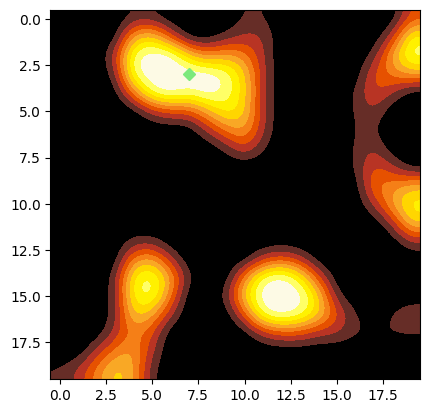

2: size=15


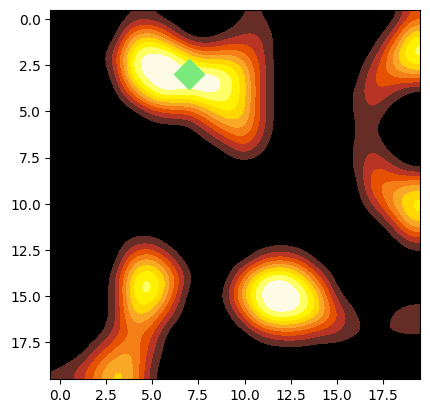

3: size=6


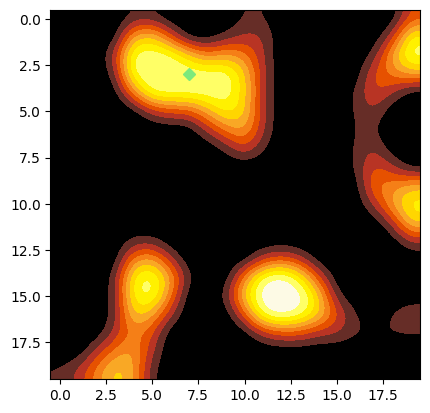

4: size=15


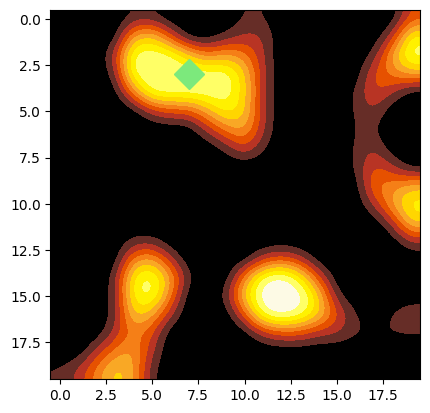

5: size=6


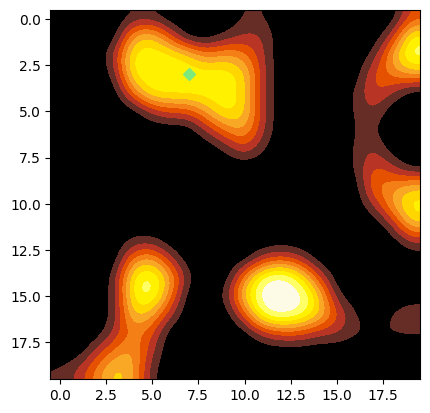

6: size=15


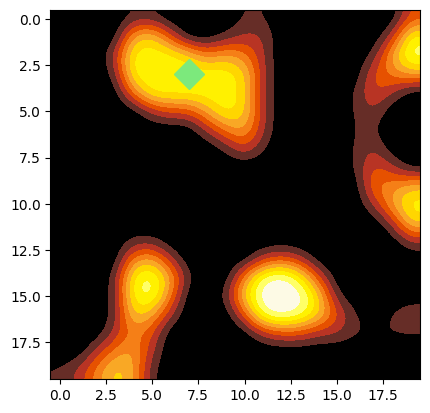

7: size=6


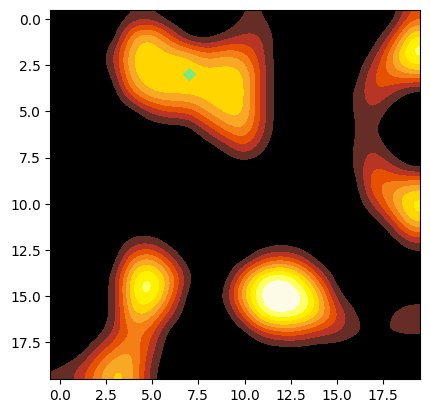

8: size=15


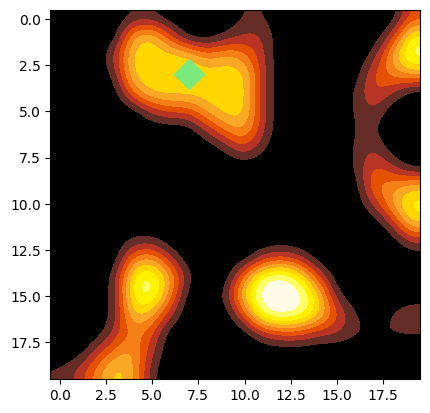

9: size=6


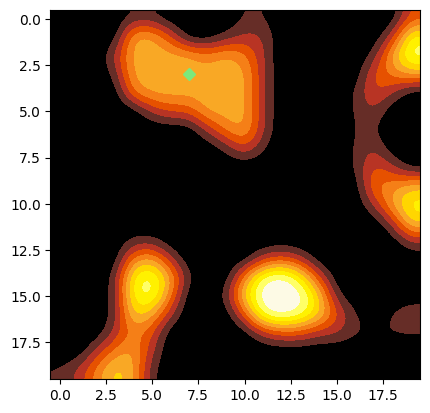

10: size=15


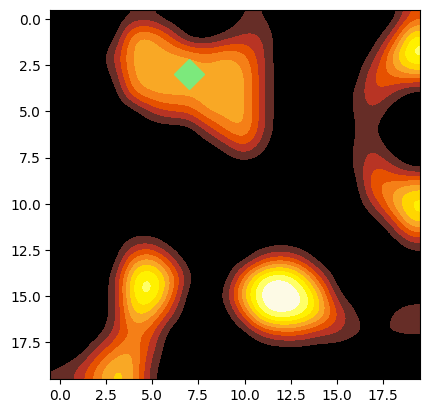

11: size=6


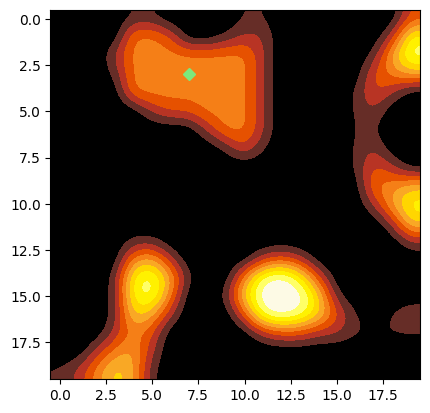

12: size=15


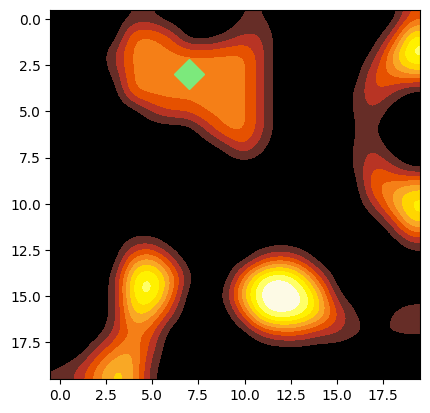

13: size=6


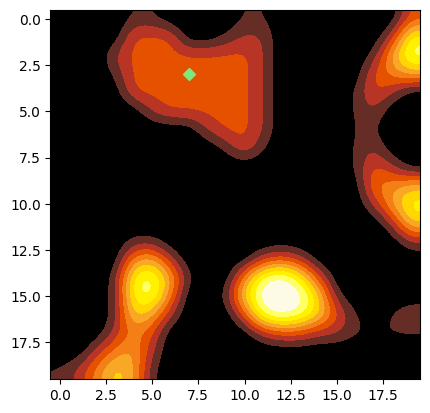

14: size=15


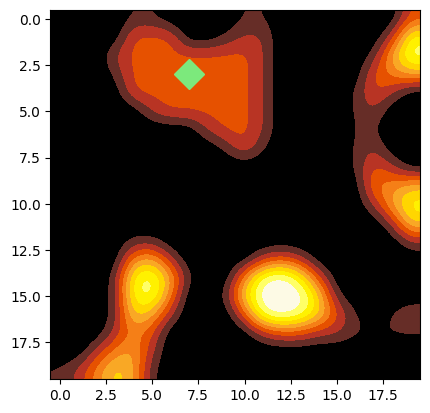

15: size=6


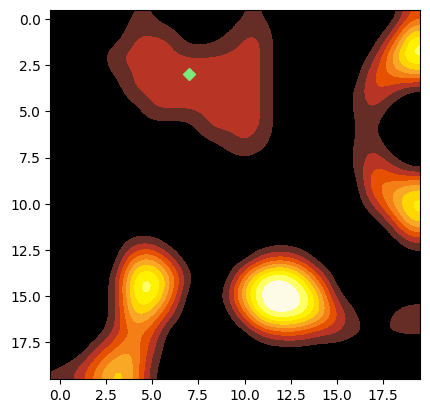

16: size=15


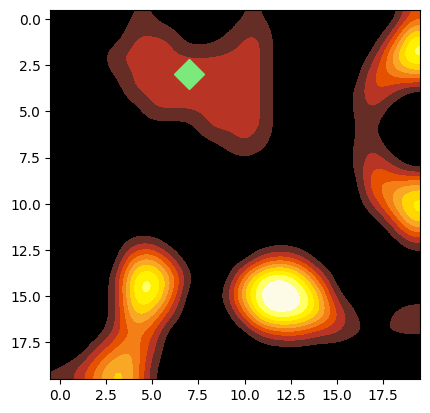

17: size=6


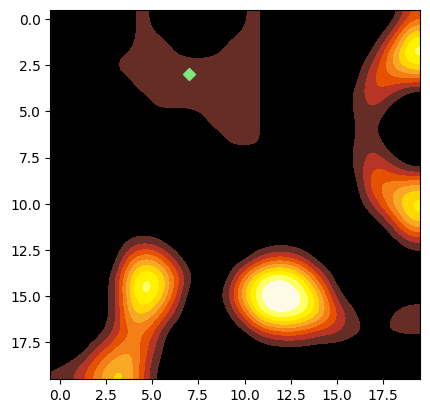

18: size=15


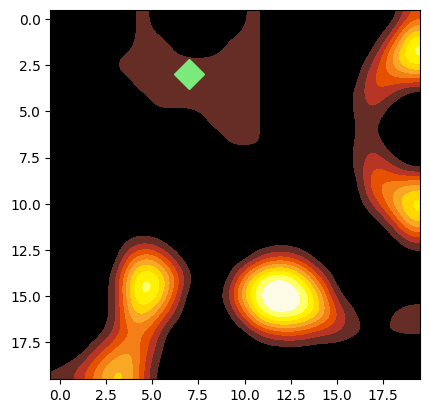

19: size=6


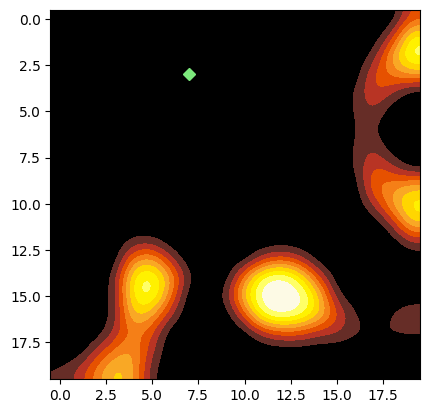

20: size=15


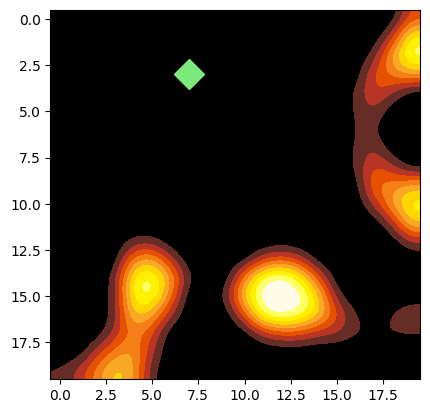

In [122]:
from collections import deque

def decrement_touching(grid, x, y):
    queue = deque([(x, y)])
    target = grid[x][y]
    while queue:
        x, y = queue.popleft()
        if grid[x][y] == target:
            grid[x][y] -= 1
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] == target:
                    queue.append((nx, ny))
                    
colors = [
    '#000000', '#662d27', '#b83424', '#e65100', '#f57f17', '#f9a825', 
    '#ffd600', '#fff100', '#ffff66', '#fdfae5'
]
cmap = ListedColormap(colors)
intp = "bicubic"
point = (3,7)

with open("testdata.txt") as f:
    grid = np.loadtxt(f, delimiter=',', dtype="int8")
grid[point]=10
    


for i in range(1, 21):
    if i&1 == 0:
        size = 15
    else:
        size = 6
        decrement_touching(grid, *point)
    print(f"{i}: {size=}")
    plt.imshow(grid, cmap=cmap, interpolation=intp)
    if i ==1:
        plt.savefig("gif/fig00.png")
    plt.plot(point[1], point[0], 'D', markersize=size, color='#7ce97c')
    plt.savefig(f"gif/fig{i:02}.png")
    #print(grid)
    plt.show()

In [124]:
import os
import cv2

folder_path = 'gif'
cropped_folder_path = 'newgif'
x, y, sx, sy = 143, 58, 370, 370 

if not os.path.exists(cropped_folder_path):
    os.makedirs(cropped_folder_path)

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        cropped_img = img[y:y+sy, x:x+sx]

        cropped_img_path = os.path.join(cropped_folder_path, filename)
        cv2.imwrite(cropped_img_path, cropped_img)

print("Cropping complete!")

Cropping complete!


In [127]:
from PIL import Image
import glob

image_files = sorted(glob.glob("newgif/fig*.png"), key=lambda x: int(x.split("fig")[1].split(".")[0]))
print(len(image_files))
images = []
for image_file in image_files:
    with Image.open(image_file) as img:
        images.append(img.copy())

images[0].save('fig_animation.gif', save_all=True, append_images=images[1:], duration=700, loop=None)

21
